1. start tensorflow

In [3]:
import tensorflow as tf
#create a constant op
#this op is added as a node to the default graph
hello=tf.constant('Hello, TensorFlow!')
print(hello.numpy())

b'Hello, TensorFlow!'


In [4]:
#computational Graph
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0, tf.float32)
node3 = tf.add(node1, node2)

print("node1:",node1, "node2", node2)
print("node3:",node3)

print("node1:", node1.numpy(), "node2:", node2.numpy())
print("node3:", node3.numpy())

node1: tf.Tensor(3.0, shape=(), dtype=float32) node2 tf.Tensor(4.0, shape=(), dtype=float32)
node3: tf.Tensor(7.0, shape=(), dtype=float32)
node1: 3.0 node2: 4.0
node3: 7.0


In [5]:
"""#placeholder였는데... 이젠 안씀
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a+b

print(sess.run(adder_node, feed_dict={a:3, b:4.5}))
print(sess.run(adder_node, feed_dict={a:[1,3], b:[2,4]}))"""

#즉시 실행
a = tf.constant(3.0, tf.float32)
b = tf.constant(4.5, tf.float32)
adder_node = a + b

print(adder_node.numpy())

a = tf.constant([1,3], tf.float32)
b = tf.constant([2,4], tf.float32)
adder_node = a + b
print(adder_node.numpy())


7.5
[3. 7.]


2. TensorFlow로 간단한 linear regresson 구현

In [6]:
#build graph: H(x)=Wx+b
x_train = [1, 2, 3]
y_train = [1, 2, 3]

W = tf.Variable(tf.random.normal([1]), name='weight') #random한 값을 1차원으로 줌
b = tf.Variable(tf.random.normal([1]), name='bias')

#가설 함수 정의
def hypothesis(x):
    return x*W + b #our hypothesis XW+b

#cost/loss function
def loss_function(hypothesis, y):
    return tf.reduce_mean(tf.square(hypothesis-y_train)) #square: 제곱, reduce_mean: 평균

#gradient descent: minimize cost
optimizer = tf.optimizers.SGD(learning_rate=0.01)
#train = optimizer.minimize(cost) tensorflow 2.x에서는 minimize 사용안됨

# 학습
epochs = 2000
for step in range(epochs):
    # Gradient 계산 및 변수 업데이트
    with tf.GradientTape() as tape:
        current_loss = loss_function(hypothesis(x_train), y_train)
    gradients = tape.gradient(current_loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))
    
    # 로그 출력
    if step % 20 == 0:
        print(step, current_loss.numpy(), W.numpy(), b.numpy())


0 7.2993684 [-0.16863056] [0.13092566]
20 0.104035795 [0.68479824] [0.47603747]
40 0.035323355 [0.77564496] [0.4871126]
60 0.031544805 [0.79342854] [0.467405]
80 0.028644642 [0.803826] [0.44574198]
100 0.026015459 [0.8131111] [0.42482254]
120 0.023627654 [0.8219005] [0.4048602]
140 0.021459028 [0.8302711] [0.38583353]
160 0.019489428 [0.8382478] [0.3677008]
180 0.01770062 [0.8458495] [0.35042024]
200 0.016075984 [0.85309404] [0.33395174]
220 0.014600462 [0.85999805] [0.31825724]
240 0.01326039 [0.8665776] [0.30330032]
260 0.012043283 [0.87284803] [0.28904638]
280 0.010937899 [0.8788237] [0.27546227]
300 0.009933977 [0.88451856] [0.26251653]
320 0.009022205 [0.88994575] [0.2501792]
340 0.008194101 [0.8951179] [0.23842172]
360 0.0074420124 [0.90004694] [0.22721678]
380 0.006758956 [0.9047444] [0.21653843]
400 0.006138601 [0.90922105] [0.20636193]
420 0.0055751726 [0.9134873] [0.1966637]
440 0.005063464 [0.917553] [0.18742125]
460 0.004598717 [0.9214278] [0.17861313]
480 0.0041766376 [0.9

결과
정답: W=1, b=0
loss가 점점 줄어들고 W=1에, b=0에 수렴함

3. linear regresson의 cost 최소화의 TensorFlow 구현

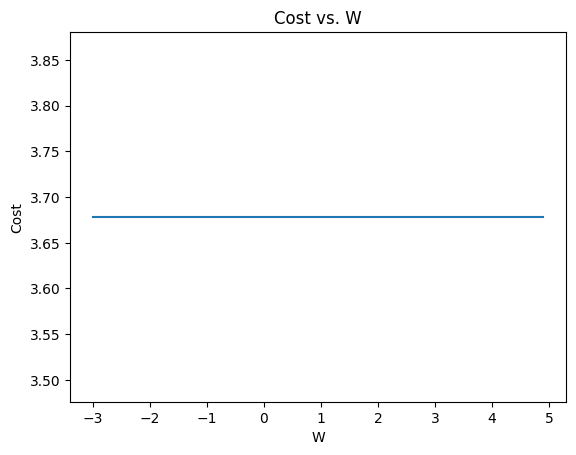

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.Variable(tf.random.normal([1]), name='weight')
hypothesis = X * W

cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.optimizers.SGD(learning_rate=0.01)

W_val = []
cost_val = []

for i in range(-30, 50):
    feed_W = i * 0.1
    W.assign([feed_W])
    curr_cost = cost.numpy()
    curr_W = W.numpy()[0]
    W_val.append(curr_W)
    cost_val.append(curr_cost)

plt.plot(W_val, cost_val)
plt.xlabel('W')
plt.ylabel('Cost')
plt.title('Cost vs. W')
plt.show()

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

X = [1, 2, 3]
Y = [1, 2, 3]

W=tf.placeholder(tf.float32)
hypothesis = X*W

cost = tf.reduce_mean(tf.square(hypothesis - Y))
sess = tf.Session()

sess.run(tf.global_variables_initializer())

W_val = []
cost_val = []
for i in range(-30,50):
    feed_W = i*0.1
    curr_cost, curr_W = sess.run([cost,W], feed_dict={W: feed_w})
    W_val.append(curr_W)
    cost_val.append(curr_cost)

plt.plot(W_val, cost_val)
plt.show()

AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

X = np.array([1., 2., 3.])
Y = np.array([1., 2., 3.])

W = tf.Variable(0.)

@tf.function
def hypothesis(X):
    return X * W

def cost_func():
    return tf.reduce_mean(tf.square(hypothesis(X) - Y))

W_val = []
cost_val = []

for i in range(-30,50):
    W.assign(i*0.1)
    curr_cost = cost_func()
    W_val.append(W.numpy())
    cost_val.append(curr_cost.numpy())

plt.plot(W_val, cost_val)
plt.show()


TypeError: in user code:

    File "C:\Users\admin\AppData\Local\Temp\ipykernel_17644\48730494.py", line 12, in hypothesis  *
        return X * W

    TypeError: Input 'y' of 'Mul' Op has type float32 that does not match type float64 of argument 'x'.
